In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
x, y =make_classification(n_features=5, n_redundant=0, n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(x, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print( df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.741668,0.233874,-1.678264,-1.418293,1.163970,1
1,-0.703676,1.816066,2.025628,1.623685,-1.856954,0
2,1.551560,0.542596,-0.014494,0.698235,-0.404249,0
3,1.047072,-0.298101,-0.276550,0.887856,-0.646044,0
4,2.237938,-0.007837,-1.276577,-0.638484,1.082236,1


In [5]:
# function for sample rows
def sample_rows(df, percent):
    return df.sample( int(percent*df.shape[0]), replace=True)

In [6]:
import random
#function for feature sampling 
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]-1))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [7]:
# function for combining sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [8]:
df1=sample_rows(df,0.2)
df2=sample_rows(df,0.2)
df3=sample_rows(df,0.2)
df3

,col1,col2,col3,col4,col5,target
54,-1.181942,-1.293974,-0.698348,-0.370960,0.554150,1
55,0.384135,0.429454,-0.190426,1.092912,-1.480406,0
95,0.055752,1.352035,0.556483,-1.432351,0.646107,1
9,-1.051025,-1.157552,-0.132314,-0.406431,-0.120590,1
64,0.643253,0.557479,-0.961304,-1.726927,0.745651,1
43,-1.650892,-0.218501,1.496394,-1.095036,1.483967,1
28,0.036357,0.916261,0.219260,-1.443720,0.465037,1
22,0.005932,-1.676873,-0.599794,-1.369061,0.762232,1
67,-1.084206,-0.373163,-0.390420,-0.408761,0.195243,1
33,3.111707,0.015809,0.930069,-0.695026,0.677450,1


In [9]:
print(df1.shape)
print(df2.shape)
print(df3.shape)


(20, 6)
(20, 6)
(20, 6)


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [11]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [12]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.875, 'x[3] <= 0.249\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.5, 0.625, 'x[2] <= -0.261\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= -0.189\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

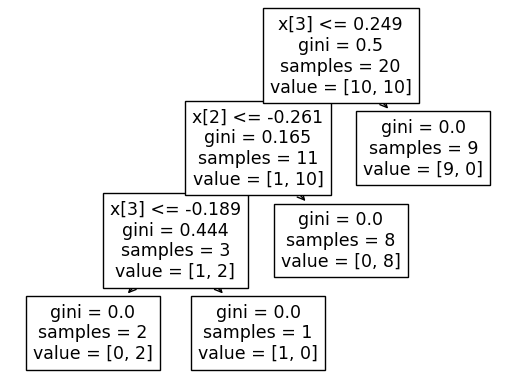

In [13]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= 0.15\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

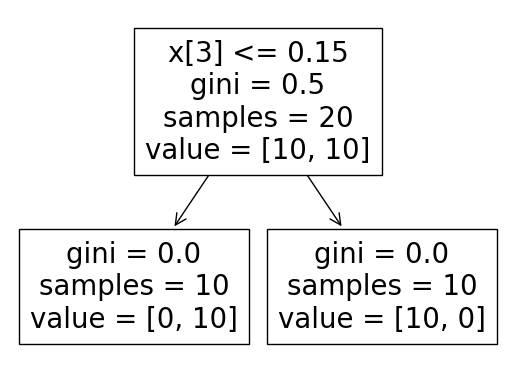

In [14]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[3] <= 0.117\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

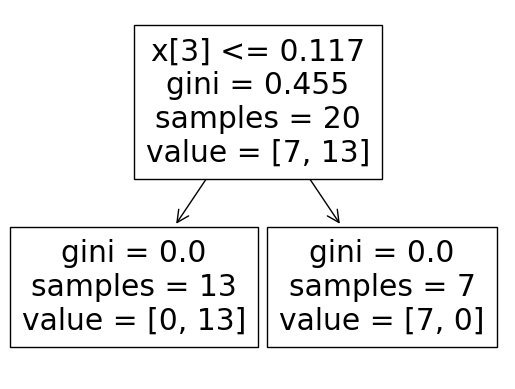

In [15]:
plot_tree(clf3)

In [16]:
clf1.predict(np.array([1.305949,	-0.611119,	-0.287717,	-1.637971,	-0.592426]).reshape(1,5))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [17]:
clf2.predict(np.array([1.305949,	-0.611119,	-0.287717,	-1.637971,	-0.592426]).reshape(1,5))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
clf3.predict(np.array([1.305949,	-0.611119,	-0.287717,	-1.637971,	-0.592426]).reshape(1,5))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

### feature sampling


In [19]:
df1 = sample_features(df, 0.9)
df2 = sample_features(df, 0.9)
df3 = sample_features(df, 0.9)
df1


C:\Users\acz\AppData\Local\Temp\ipykernel_19316\4137590610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\acz\AppData\Local\Temp\ipykernel_19316\4137590610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\acz\AppData\Local\Temp\ipykernel_19316\4137590610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,col1,col3,col4,col2,target
0,0.741668,-1.678264,-1.418293,0.233874,1
1,-0.703676,2.025628,1.623685,1.816066,0
2,1.551560,-0.014494,0.698235,0.542596,0
3,1.047072,-0.276550,0.887856,-0.298101,0
4,2.237938,-1.276577,-0.638484,-0.007837,1
...,...,...,...,...,...
95,0.055752,0.556483,-1.432351,1.352035,1
96,-0.515104,-0.448920,1.688024,-1.294999,0
97,-0.073193,-1.681362,0.409445,-0.156980,0
98,1.864766,1.359958,1.221880,2.249811,0


In [20]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [21]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[2] <= 0.397\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3333333333333333, 0.7, 'x[2] <= -0.058\ngini = 0.074\nsamples = 52\nvalue = [2, 50]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(0.5, 0.5, 'x[0] <= -1.089\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 0.839\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]')]

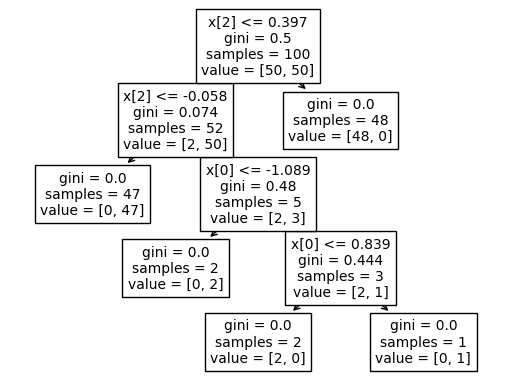

In [22]:
plot_tree(clf1)

[Text(0.5, 0.9, 'x[3] <= 0.397\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3333333333333333, 0.7, 'x[3] <= -0.058\ngini = 0.074\nsamples = 52\nvalue = [2, 50]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(0.5, 0.5, 'x[0] <= -0.444\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 0.833\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]')]

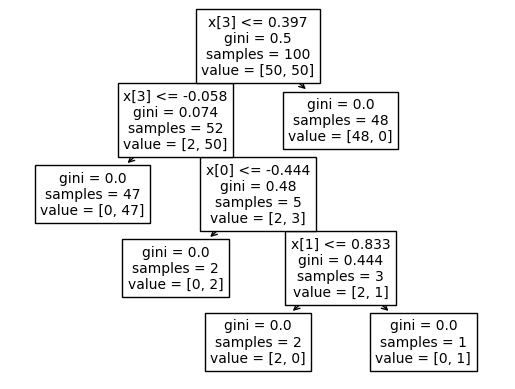

In [23]:
plot_tree(clf2)

[Text(0.4722222222222222, 0.9, 'x[2] <= -0.183\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2222222222222222, 0.7, 'x[2] <= -0.344\ngini = 0.083\nsamples = 46\nvalue = [44, 2]'),
 Text(0.1111111111111111, 0.5, 'x[1] <= 0.804\ngini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.16666666666666666, 0.3, 'x[1] <= 0.959\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= -0.273\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2777777777777778, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3888888888888889, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7222222222222222, 0.7, 'x[2] <= 0.362\ngini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(0.5555555555555556, 0.5, 'x[3] <= -0.418\ngini = 0.4

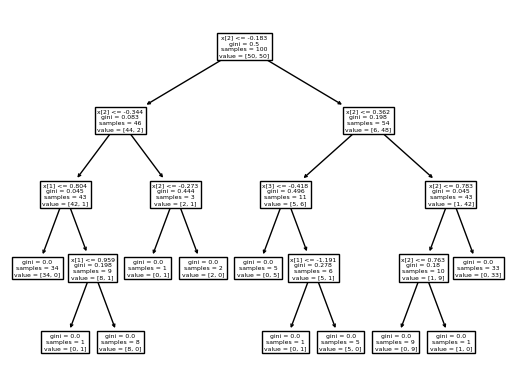

In [24]:
plot_tree(clf3)

In [25]:
df3

,col3,col2,col5,col1,target
0,-1.678264,0.233874,1.163970,0.741668,1
1,2.025628,1.816066,-1.856954,-0.703676,0
2,-0.014494,0.542596,-0.404249,1.551560,0
3,-0.276550,-0.298101,-0.646044,1.047072,0
4,-1.276577,-0.007837,1.082236,2.237938,1
...,...,...,...,...,...
95,0.556483,1.352035,0.646107,0.055752,1
96,-0.448920,-1.294999,-2.418553,-0.515104,0
97,-1.681362,-0.156980,0.259039,-0.073193,0
98,1.359958,2.249811,-1.232520,1.864766,0


In [26]:
clf1.predict(np.array([-0.407644,	0.949554,	-1.531096,	-1.458282]).reshape(1,4))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [27]:
clf2.predict(np.array([-0.407644,	0.949554,	-1.531096,	-1.458282]).reshape(1,4))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [28]:
clf3.predict(np.array([-0.407644,	0.949554,	-1.531096,	-1.458282]).reshape(1,4))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Combined Sampling

In [29]:
df1=combined_sampling(df, 0.5, 0.5)
df2=combined_sampling(df, 0.5, 0.5)
df3=combined_sampling(df, 0.5, 0.5)

df1.shape

C:\Users\acz\AppData\Local\Temp\ipykernel_19316\4137590610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\acz\AppData\Local\Temp\ipykernel_19316\4137590610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\acz\AppData\Local\Temp\ipykernel_19316\4137590610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

(50, 3)

In [30]:
df1.head()

,col2,col5,target
14,-0.347456,-0.612168,0
87,0.213045,1.351248,1
98,2.249811,-1.232520,0
31,0.619318,1.264296,1
19,-0.653894,1.759795,1


In [31]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [32]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.875, 'x[1] <= -0.135\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.4, 0.625, 'x[1] <= -0.344\ngini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.6, 0.375, 'x[1] <= -0.273\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]')]

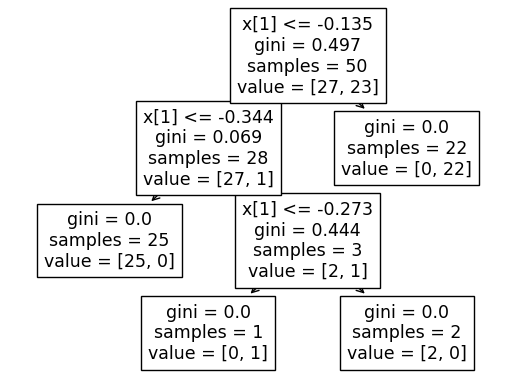

In [33]:
plot_tree(clf1
          )

[Text(0.5, 0.75, 'x[0] <= 0.4\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]')]

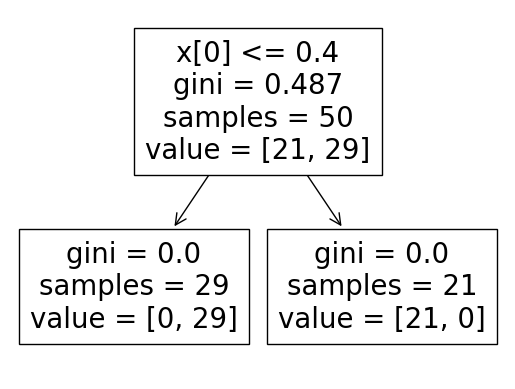

In [34]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[0] <= 0.4\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]')]

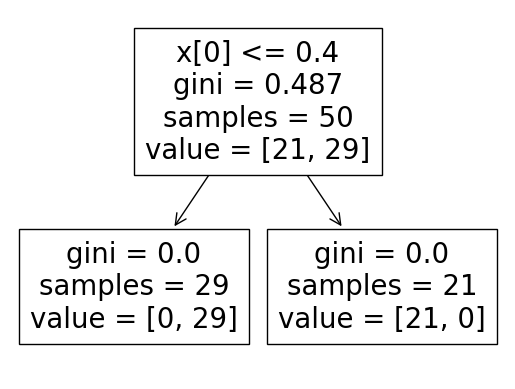

In [35]:
plot_tree(clf2)

In [36]:
df3.head()

,col4,col3,target
23,1.237697,-0.321610,0
9,-0.406431,-0.132314,1
71,-1.035087,-1.243026,1
42,0.089435,0.275707,1
47,-0.414334,0.139522,1


In [39]:
clf3.predict(np.array([0.723598,-0.958182] ).reshape(1,2) )

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])